# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane show a slightly higher mice timepoints than the other drugs
- Average and range of tumor volume seems to also be a little higher with Infubinol and Ramicane, indicating that Capomulin and Ramicane can be slightly more affective due to lower than average and range of tumor volume size
- There is a strong positive correlation between mouse weight and the average tumor volume when using the drug Capomulin with an r score of = 0.84.

 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = 'left' )

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_study_results_df[mouse_study_results_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicated_results_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == 'g989'].index
study_results_clean_df = mouse_study_df.drop(duplicated_results_df)

#Clean df
study_results_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [224]:
# Checking the number of mice in the clean DataFrame.
study_results_clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#mean
summary_mean = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_stats_df = pd.DataFrame(summary_mean)
#rename column
summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
summary_stats_df



,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [226]:
summary_stats_df = summary_stats_df.reset_index()

In [227]:
summary_stats_df.dtypes

Drug Regimen          object
Mean Tumor Volume    float64
dtype: object

In [228]:
#median
summary_median = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_median
summary_median_df = pd.DataFrame(summary_median)
#rename column
summary_median_df = summary_median_df.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
summary_median_df

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [229]:
summary_median_df = summary_median_df.reset_index()

In [230]:
summary_median_df

,Drug Regimen,Median Tumor Volume
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [231]:
summary_median_df.dtypes

Drug Regimen            object
Median Tumor Volume    float64
dtype: object

In [232]:
summary_stats_df = pd.merge(summary_stats_df,summary_median_df, on = 'Drug Regimen')

In [233]:
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285
5,Placebo,54.033581,52.288934
6,Propriva,52.320930,50.446266
7,Ramicane,40.216745,40.673236
8,Stelasyn,54.233149,52.431737
9,Zoniferol,53.236507,51.818479


In [234]:
#variance
summary_var = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
# summary_var
summary_var_df = pd.DataFrame(summary_var)
#rename column
summary_var_df = summary_var_df.rename(columns={'Tumor Volume (mm3)':'Var Tumor Volume'})
summary_var_df

,Var Tumor Volume
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [235]:
summary_var_df = summary_var_df.reset_index()

In [236]:
summary_stats_df = pd.merge(summary_stats_df,summary_var_df, on = 'Drug Regimen')
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.320930,50.446266,43.852013
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [237]:
# standard deviation
summary_std = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
# summary_std
summary_std_df = pd.DataFrame(summary_std)
#rename column
summary_std_df = summary_std_df.rename(columns={'Tumor Volume (mm3)':'Std Tumor Volume'})
summary_std_df

,Std Tumor Volume
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [238]:
summary_std_df = summary_std_df.reset_index()

In [239]:
summary_stats_df = pd.merge(summary_stats_df,summary_std_df, on = 'Drug Regimen')
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.320930,50.446266,43.852013,6.622085
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [240]:
#sem
summary_sem = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
# summary_sem
summary_sem_df = pd.DataFrame(summary_sem)
#rename column
summary_sem_df = summary_sem_df.rename(columns={'Tumor Volume (mm3)':'Sem Tumor Volume'})
summary_sem_df

,Sem Tumor Volume
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [242]:
summary_sem_df = summary_sem_df.reset_index()

In [243]:
summary_stats_df = pd.merge(summary_stats_df,summary_sem_df, on = 'Drug Regimen')
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume,Sem Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003,7.821003
6,Propriva,52.320930,50.446266,43.852013,6.622085,6.622085
7,Ramicane,40.216745,40.673236,23.486704,4.846308,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,6.966589


In [244]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_adv_summary_df = study_results_clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

study_adv_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

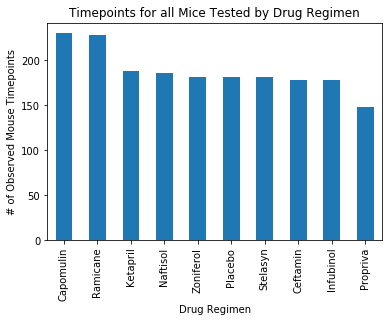

In [254]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoints_by_mouse = study_results_clean_df.groupby('Drug Regimen')['Mouse ID'].count()

#DataFrame
bar_chart_timepoints_df = pd.DataFrame(timepoints_by_mouse)

#order
bar_chart_timepoints_df = bar_chart_timepoints_df.sort_values('Mouse ID', ascending = False)

#create bar_chart
bar_plot = bar_chart_timepoints_df.plot(kind ='bar', legend=False, align='center', title='Timepoints for all Mice Tested by Drug Regimen')

bar_plot.set_ylabel('# of Observed Mouse Timepoints')

plt.show()

In [255]:
test_mouse_gender = study_results_clean_df.groupby(['Sex']).count()
test_mouse_gender


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


Text(0,0.5,'Sex')

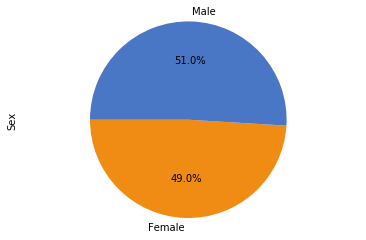

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = ["Female", "Male"]
test_mouse_gender_df = pd.DataFrame(test_mouse_gender)
total_pie=test_mouse_gender_df.plot(kind='pie', y='Mouse ID', legend = False, autopct = "%1.1f%%", colors = ("#F08C14", "#4A76C6"), startangle = 180 )
plt.axis("equal")
total_pie.set_ylabel("Sex")

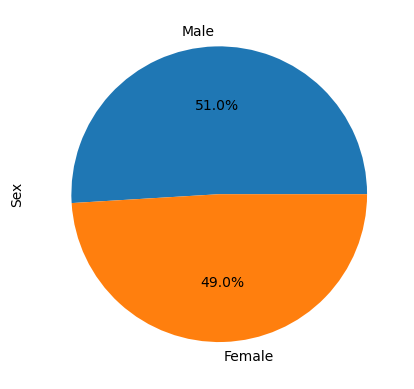

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [258]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_teatments =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatments_filtered_df = study_results_clean_df[study_results_clean_df['Drug Regimen'].isin(target_teatments)]
treatments_filtered_df.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [259]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_max_df = study_results_clean_df.loc[study_results_clean_df.groupby('Mouse ID')['Timepoint'].idxmax(), :].reset_index()
tumor_max_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1783,a262,45,70.717621,4,Placebo,Female,17,29
3,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
4,1401,a366,30,63.440686,1,Stelasyn,Female,16,29
5,1839,a401,45,66.794156,4,Zoniferol,Female,8,25
6,1773,a411,45,38.407618,1,Ramicane,Male,3,22
7,1836,a444,45,43.047543,0,Ramicane,Female,10,25
8,543,a457,10,49.783419,0,Ketapril,Female,11,30
9,1845,a492,45,60.122011,1,Stelasyn,Male,20,25


In [261]:
#Filter for Drug regimens and subset

study_results_clean_df
mask = tumor_max_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
target_drugs_final_result_df = tumor_max_df.loc[mask]

#sort df by the Drug Regimen
target_drugs_final_result_df = target_drugs_final_result_df.sort_values(["Drug Regimen"]).reset_index(drop = True)

#rename
target_drugs_final_result_df = target_drugs_final_result_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)","Timepoint":"Final Timepoint"})

#clean up
max_tumor_vol_by_drug_df = target_drugs_final_result_df.drop(columns=['index', 'Final Timepoint' ])
max_tumor_vol_by_drug_df =  max_tumor_vol_by_drug_df[['Drug Regimen','Final Tumor Volume (mm3)', 'Mouse ID','Metastatic Sites','Sex','Age_months','Weight (g)']]

max_tumor_vol_by_drug_df 

,Drug Regimen,Final Tumor Volume (mm3),Mouse ID,Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,38.846876,l897,1,Male,17,19
1,Capomulin,38.125164,j119,1,Female,7,23
2,Capomulin,38.753265,j246,1,Female,21,21
3,Capomulin,31.023923,u364,3,Male,18,17
4,Capomulin,40.159220,g316,2,Female,22,22
5,Capomulin,37.074024,g288,1,Male,3,19
6,Capomulin,30.485985,f966,0,Male,16,17
7,Capomulin,34.455298,t565,0,Female,20,17
8,Capomulin,40.728578,s710,1,Female,1,23
9,Capomulin,40.658124,v923,2,Female,19,21


In [262]:
#drug_types list
target_drug = max_tumor_vol_by_drug_df ['Drug Regimen'].unique()

#df for IQR
target_drug_df = pd.DataFrame(columns = target_drug)
target_drug_df

#Set up a loop to fill the dataframe (target_drug_df) with the final volume of the tumours for each drug 
for drug in target_drug:
    final_volume = max_tumor_vol_by_drug_df[max_tumor_vol_by_drug_df["Drug Regimen"]== drug]["Final Tumor Volume (mm3)"]
    target_drug_df[drug] = final_volume.tolist()
    
target_drug_df   
    

,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.846876,64.192341,50.005138,30.276232
1,38.125164,61.849023,55.650681,38.407618
2,38.753265,46.784535,51.542431,43.047543
3,31.023923,68.923185,54.048608,44.183451
4,40.159220,64.299830,67.685569,38.810366
5,37.074024,59.851956,46.250112,31.095335
6,30.485985,67.748662,54.656549,32.978522
7,34.455298,45.000000,58.268442,45.220869
8,40.728578,57.918381,67.973419,36.561652
9,40.658124,47.784682,55.629428,43.166373


In [295]:
#prepare for box plot

#Capomulin
quartiles = target_drug_df['Capomulin'].quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_lower_bound = cap_lower_bound

#Ceftamin
quartiles = target_drug_df['Ceftamin'].quantile([.25,.5,.75])
ce_lowerq = quartiles[0.25]
ce_upperq = quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
ce_iqr  

#Infubinol
quartiles = target_drug_df['Infubinol'].quantile([.25,.5,.75])
i_lowerq = quartiles[0.25]
i_upperq = quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
i_iqr

#Ramicane
quartiles = target_drug_df['Ramicane'].quantile([.25,.5,.75])
r_lowerq = quartiles[0.25]
r_upperq = quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr )
r_upper_bound =r_upperq + (1.5*r_iqr )
r_iqr  

# Capomulin
print(f"Capomulin's potential outliers will be below {cap_lower_bound:.3f} and above {cap_upper_bound:.3f} volume mm3.")
# Ceftamin
print(f"Ceftamin's potential outliers will be below {ce_lower_bound:.3f} and above {ce_upper_bound:.3f} volume mm3.")
# Infubinol
print(f"Infubinol's potential outliers will be below {i_lower_bound:.3f} and above {i_upper_bound:.3f} volume mm3.")
#Ramicane
print(f"Ramicane's potential outliers will be below {r_lower_bound:.3f} and above {r_upper_bound:.3f} volume mm3.")

Capomulin's potential outliers will be below 20.705 and above 51.832 volume mm3.
Ceftamin's potential outliers will be below 25.355 and above 87.666 volume mm3.
Infubinol's potential outliers will be below 36.833 and above 82.741 volume mm3.
Ramicane's potential outliers will be below 17.913 and above 54.307 volume mm3.


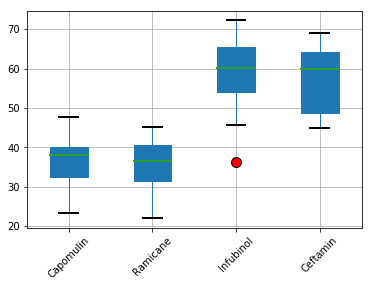

In [266]:
boxplot = target_drug_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'], rot=45,\
                                patch_artist = True, boxprops = dict(facecolor = 'lightblue', color = 'blue'),\
                                capprops = dict(color = 'black', linewidth=2), flierprops = dict(marker = 'o', markerfacecolor='red', markersize=10),\
                                medianprops = dict(color = 'black', linewidth=2))  

## Line and Scatter Plots

In [276]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Select results for Capomulin from the original clean dataframe (to restore all timepoints).
capomulin_results_df = study_results_clean_df[(study_results_clean_df["Drug Regimen"]=='Capomulin')]

#list of mouse_id
mouse_id = list(capomulin_results_df['Mouse ID'].unique())

#select #l509 as mouse number
random_mouse_id = 'l509'
capomulin_results_by_mouse = capomulin_results_df[(capomulin_results_df['Mouse ID']==random_mouse_id)]
capomulin_results_by_mouse 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


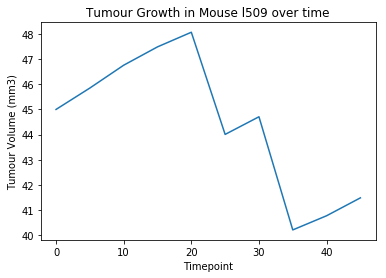

In [277]:
plt.plot(capomulin_results_by_mouse['Timepoint'],capomulin_results_by_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume (mm3)')
plt.title(f'Tumour Growth in Mouse {random_mouse_number} over time')
plt.show()

In [278]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_results_df

#Avg tumour size by mouse ID for Capomulin
avg_tumor_size_capomulin = capomulin_results_df.groupby(('Mouse ID'))
avg_size_weight_capomulin = avg_tumor_size_capomulin.agg({'Tumor Volume (mm3)':'mean', 'Weight (g)': 'first'})

avg_size_weight_capomulin


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


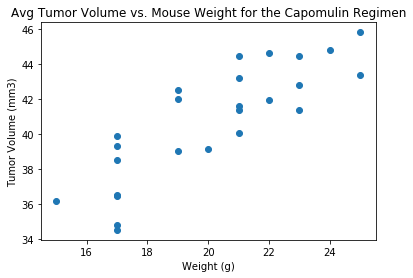

In [282]:
plt.scatter(avg_size_weight_capomulin.iloc[:,1],avg_size_weight_capomulin.iloc[:,0])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


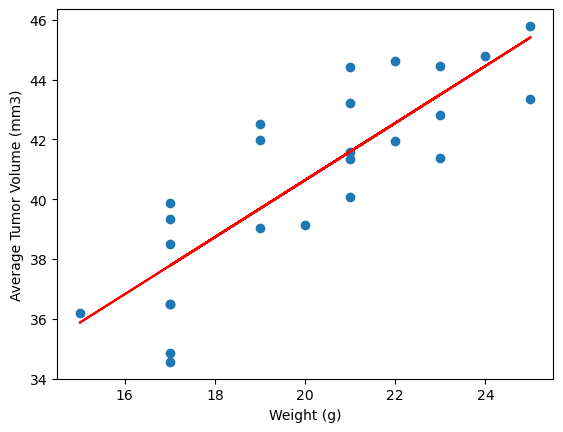

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume 0.84


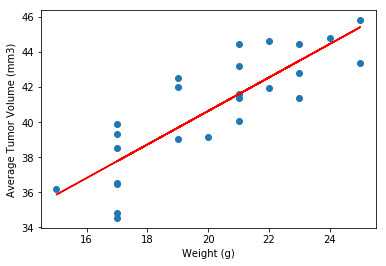

In [291]:
from scipy.stats import linregress

x_values = avg_size_weight_capomulin['Weight (g)']
y_values = avg_size_weight_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print (f'The correlation between mouse weight and the average tumor volume {round(rvalue,2)}')